Nesse caderno, iremos trabalhar nossos conhecimento adquiridos acerca de árvore de regressão, assim como o nosso domínio com visualização de árvore, pré e pós poda.

Exercícios do módulo Árvore de Regressão do curso de ciência de dados da EBAC.

# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [39]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#base de dados
boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
#variáveis explicativas
x = boston.drop(columns = ['medv'])
#variável resposta
y = boston.medv

In [40]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [41]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

# **EXERCÍCIO 1**
---
---

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [42]:
#A única mudança necessária será passar a variável chas para booleano
x.chas = x.chas.astype('bool')

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [43]:
x.select_dtypes(include='number').corr()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
nox,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993
ptratio,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044


tax - rad: 0.91

induis - nox :  0.76

dis - nox: - 0.76

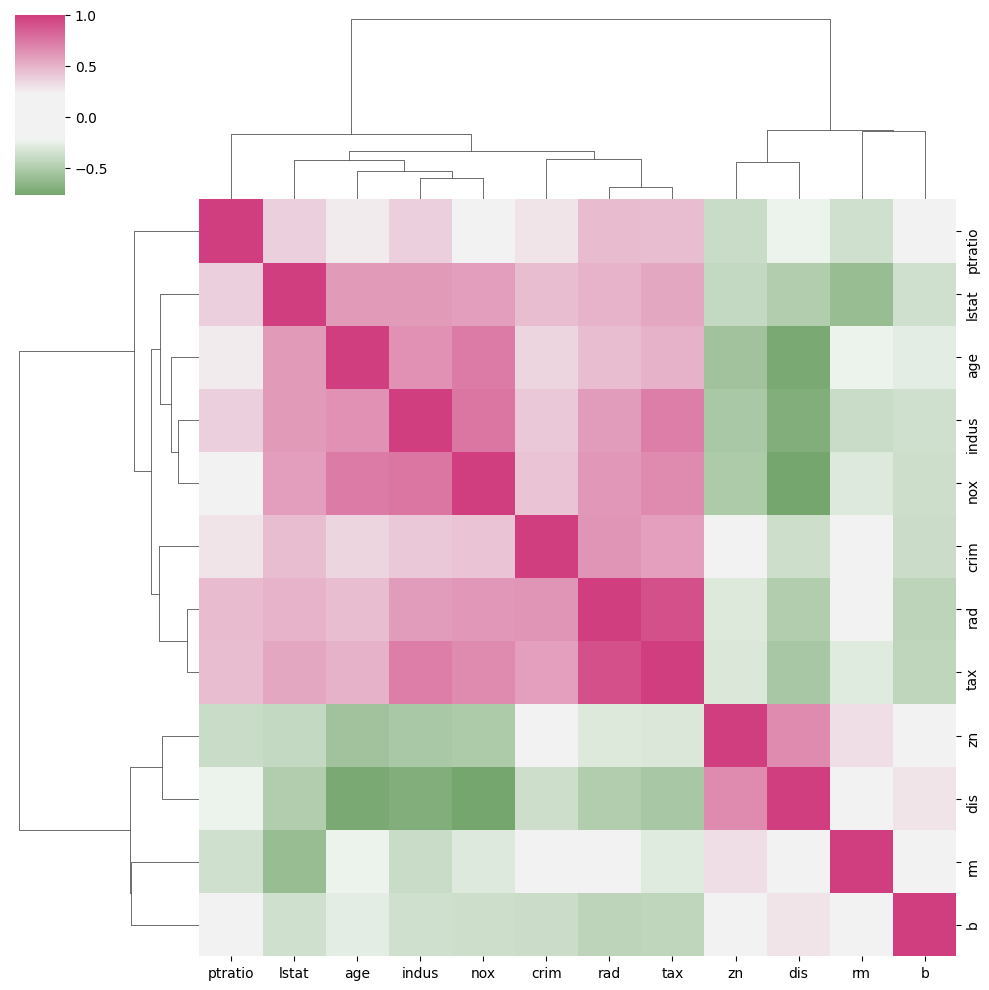

In [44]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(x.select_dtypes(include='number').corr(), figsize=(10, 10), center = 0, cmap=cmap)

Há duas variáveis com bastante potencial preditivo, onde possuem mapa de calor mais forte na matriz de correlação:

* `tax`: taxa de imposto sobre a propriedade de valor total por \\$10,000
* `nox`: concentração de óxido nítrico (em partes por 10 milhões)

### 3. Separe os dados em validação e teste

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [46]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [47]:
#Fazendo o predict tanto da base de treino quanto da base de teste para ambas tipos de árvores:
#Arvore de profundidade 2
y_pred_train_regr_1 = regr_1.predict(x_train)
y_pred_test_regr_1 = regr_1.predict(x_test)

#Árvore de profundidade 8
y_pred_train_regr_2 = regr_2.predict(x_train)
y_pred_test_regr_2 = regr_2.predict(x_test)

In [48]:
#Calculando o MSE de cada árvore:
mse_train_regr_1 = mean_squared_error(y_train, y_pred_train_regr_1)
mse_test_regr_1 = mean_squared_error(y_test, y_pred_test_regr_1)

mse_train_regr_2 = mean_squared_error(y_train, y_pred_train_regr_2)
mse_test_regr_2 = mean_squared_error(y_test, y_pred_test_regr_2)

In [49]:
template = "MSE da árvore com profundidade {0} para a base {1} é: {2:.2f}"

In [50]:
print(template.format(regr_1.get_depth(), "de treinamento", mse_train_regr_1).replace(".", ","))
print(template.format(regr_1.get_depth(), "de testes", mse_test_regr_1).replace(".", ","))

print(template.format(regr_2.get_depth(), "de treinamento", mse_train_regr_2).replace(".", ","))
print(template.format(regr_2.get_depth(), "de testes", mse_test_regr_2).replace(".", ","))

MSE da árvore com profundidade 2 para a base de treinamento é: 21,12
MSE da árvore com profundidade 2 para a base de testes é: 39,33
MSE da árvore com profundidade 8 para a base de treinamento é: 1,53
MSE da árvore com profundidade 8 para a base de testes é: 25,92


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A ávore mais adequada é a ávore com poda de 8 profundidade, o qual obteve o menor erro quadrático médio. 1,53 para o treino e 29,03 para o teste.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

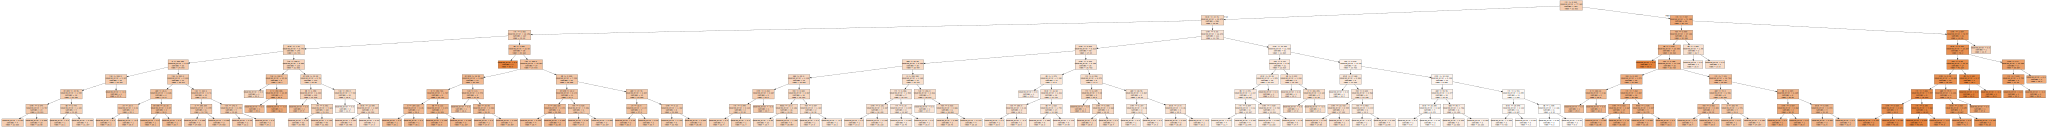

In [51]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(regr_2, out_file=None,
                                feature_names=x.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

Visualizando a ávore, a variável mais importante, que foi o teste da primeira folha, foi a variável `rm`, número médio de quartos por habitação.

# **EXERCÍCIO 2**
---
---

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [52]:
#Criando o caminho da árvore com profundidade 2 e salvando os ccp e as impurezas
path = regr_2.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [53]:
ccp_alphas

array([0.00000000e+00, 5.64971751e-05, 5.64971751e-05, 6.35593220e-05,
       2.25988701e-04, 3.53107345e-04, 4.61393597e-04, 6.77966102e-04,
       6.92090395e-04, 6.92090395e-04, 7.62711864e-04, 1.41242938e-03,
       1.41242938e-03, 1.70903955e-03, 2.07627119e-03, 2.28813559e-03,
       2.88370998e-03, 2.94256121e-03, 3.05084746e-03, 3.17796610e-03,
       3.95951036e-03, 4.52448211e-03, 4.76694915e-03, 5.12711864e-03,
       6.15254237e-03, 6.92090395e-03, 7.47175141e-03, 7.68989328e-03,
       7.91431262e-03, 7.91902072e-03, 7.95668550e-03, 8.60909335e-03,
       9.18432203e-03, 9.64218456e-03, 9.79661017e-03, 1.10734463e-02,
       1.10746234e-02, 1.27120662e-02, 1.35969868e-02, 1.44632768e-02,
       1.53813559e-02, 1.59130571e-02, 1.90960452e-02, 2.35310734e-02,
       2.37570621e-02, 2.38265626e-02, 2.44067797e-02, 2.64500942e-02,
       2.65762712e-02, 2.71509282e-02, 2.71939736e-02, 2.92658730e-02,
       3.07793023e-02, 3.08898305e-02, 3.35111563e-02, 3.55021400e-02,
      

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [54]:
#lista que salvará as árvores para todos esses ccp
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [55]:
#Iremos calcular o erro de cada uma dessas árvores, tanto para treino quanto para teste
#E salvar em duas lista, respectivamente.

train_scores = [mean_squared_error(y_train , clf.predict(x_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(x_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

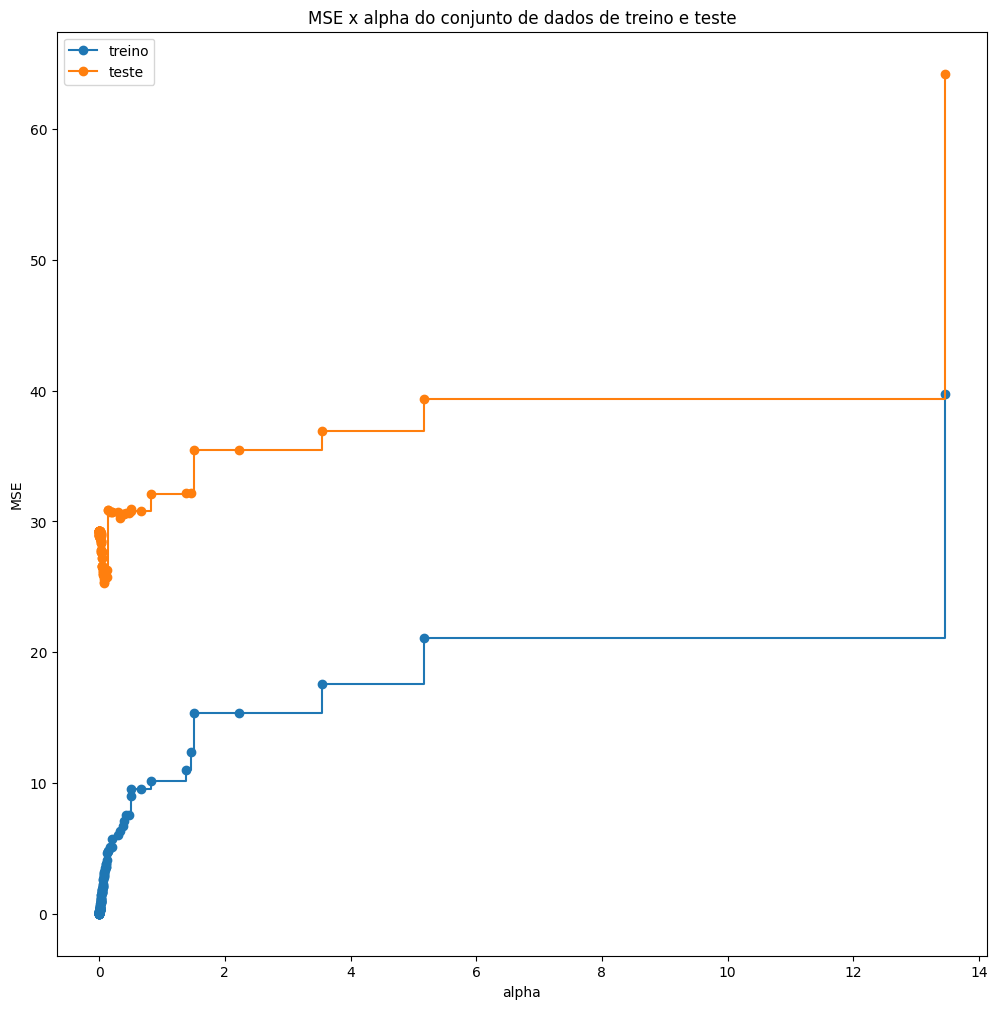

In [56]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

Podemos conferir que quanto menor o alppha, menor será o erro tanto para teste quanto para treinamento, portanto, irei selecionar o menor valor daquela lista dos ccp_alphas. Que é 1.10.

In [57]:
arvore_final = DecisionTreeRegressor(random_state = 110, ccp_alpha=1.1)
arvore_final.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=1.1, random_state=110)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [58]:
print(f'R-quadrado na base de testes: {arvore_final.score(x_test, y_test): .2f}')

R-quadrado na base de testes:  0.67


### 7. Visualize esta árvore.

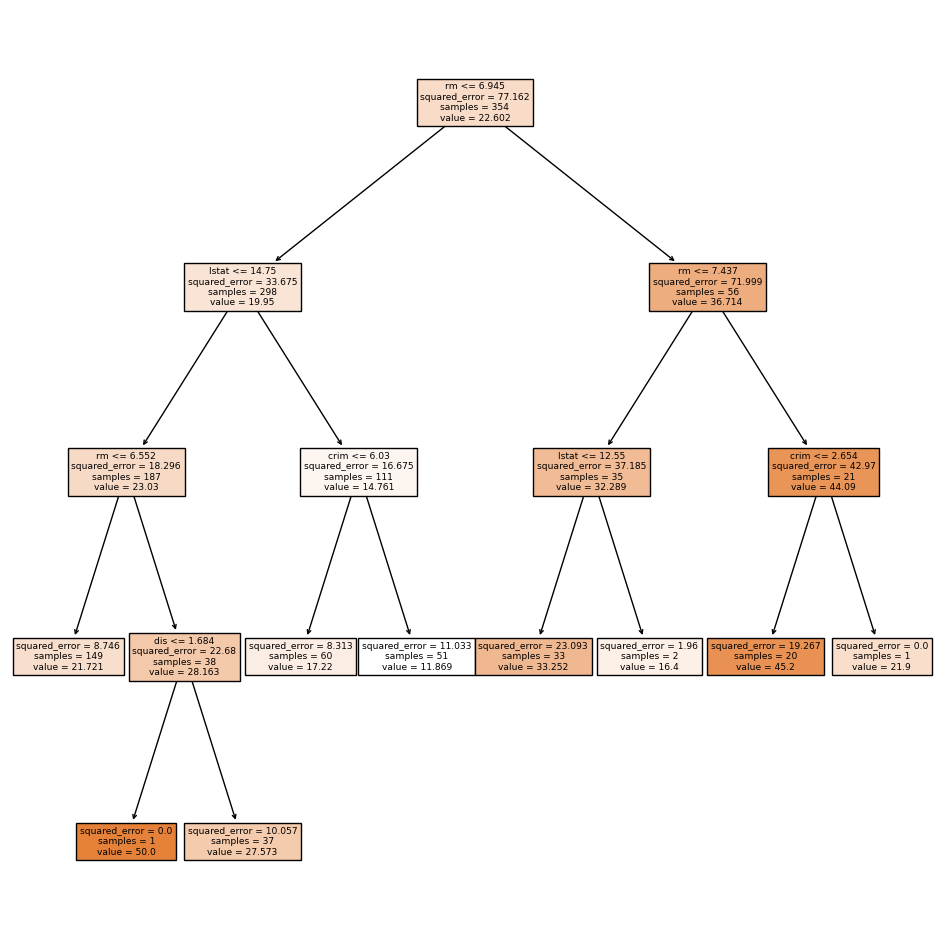

In [59]:
plt.rc('figure', figsize=(12, 12))
tp = tree.plot_tree(arvore_final,
                    feature_names=x.columns,
                    filled=True)